In [1]:
#%loadpy /home/tony/Desktop/PythonScripts/Coords/KATaltazPlo.py

Populating the interactive namespace from numpy and matplotlib


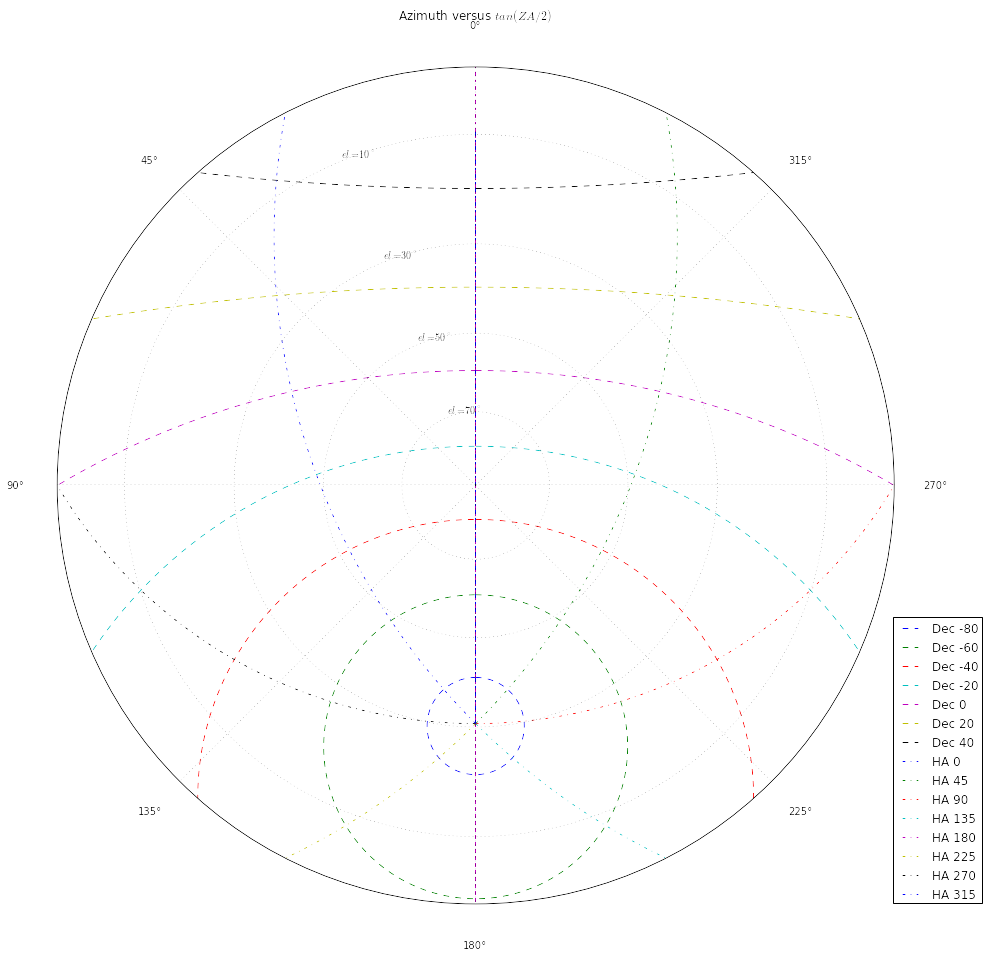

In [2]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.figure(figsize=(15,15))

lat=np.radians(-30.7148) #latitude of KAT7
coslat=np.cos(lat)
sinlat=np.sin(lat)


def elev(ha,dec):    #elevation and azimuth
    """
    ha,dec => az,el
    All values are in radians
    az 180 is SOUTH
    """
    elev=np.arcsin((np.sin(dec)*sinlat +np.cos(dec)*np.cos(ha)*coslat))                    #el
    azim=np.arctan2(-1*(np.cos(dec)*np.sin(ha)),-1* (np.cos(dec)*np.cos(ha)*sinlat-np.sin(dec)*coslat))#az    
    return (azim,elev)
   


ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)


hadeg=np.linspace(0,360,304) # lots of steps entries 
ha=np.radians(hadeg)
for decdeg in np.arange(-80,50,20):  # hadeg is HA in degrees, decdeg is Dec in degrees
    dec=np.radians(decdeg)
    azel=elev(ha,dec)
    az=azel[0]
    el=azel[1]
    za=np.pi/2.0 - el # zenith angle
    t2=np.tan(za/2.0) # tan/2 zenith angle

    #print ha,dec,az,el,t2,s
    ax.plot(az,t2,label="Dec "+str(decdeg),linestyle="--")
#
decdeg=np.linspace(-90,50,300)
dec=np.radians(decdeg)
for hadeg in np.arange(0,360,45):
    ha=np.radians(hadeg)
    azel=elev(ha,dec)
    az=azel[0]
    el=azel[1]
    za=np.pi/2.0 - el # zenith angle
    t2=np.tan((za)/2.0) # tan (0.5 *zenith angle)

    #print ha,dec,az,el,t2,s
    ax.plot(az,t2,label="HA "+str(hadeg),linestyle="-.") 

#plt.xlabel("Az")
#plt.ylabel("El")
#plt.ylim(0,90)
#plt.xlim(-180,180)

ax.set_rmax(1.0)

ax.legend( loc=(1.,0.),ncol=1) # 
plt.title('Azimuth versus $tan(ZA/2)$')
zas=np.tan(np.radians([10,20,30,40])) # 20,40,60,80 deg from zenith
plt.rgrids(zas,labels=['$el=70^\circ$','$el=50^\circ$','$el=30^\circ$','$el=10^\circ$'])
plt.show()




In [3]:
def hadec(az,el):
    """
    az,el => ha,dec
    All values are in radians
    az 0 is NORTH
    """
    x= -np.cos(az)*np.cos(el)*sinlat +np.sin(el)*coslat
    y= -np.sin(az)*np.cos(el)
    z=  np.cos(az)*np.cos(el)*coslat +np.sin(el)*sinlat
    r= np.sqrt(x*x +y*y)
    
    ha= np.arctan2(y,x)
    dec=np.arctan2(z,r)
    
    #dec=np.arcsin(np.sin(el)*sinlat -np.cos(el)*np.cos(az)*coslat) #declination
    #ha=np.arctan2((np.cos(el)*np.sin(az)),(np.sin(el)*coslat +np.cos(el)*np.cos(az)*sinlat)) #hour angle
    return (ha,dec)

print hadec(0,0), hadec(3.14,0.5 )
#print coslat,sinlat

(-0.0, 1.0347219377033423) (-3.1028585138812752, -1.5346954164873641)


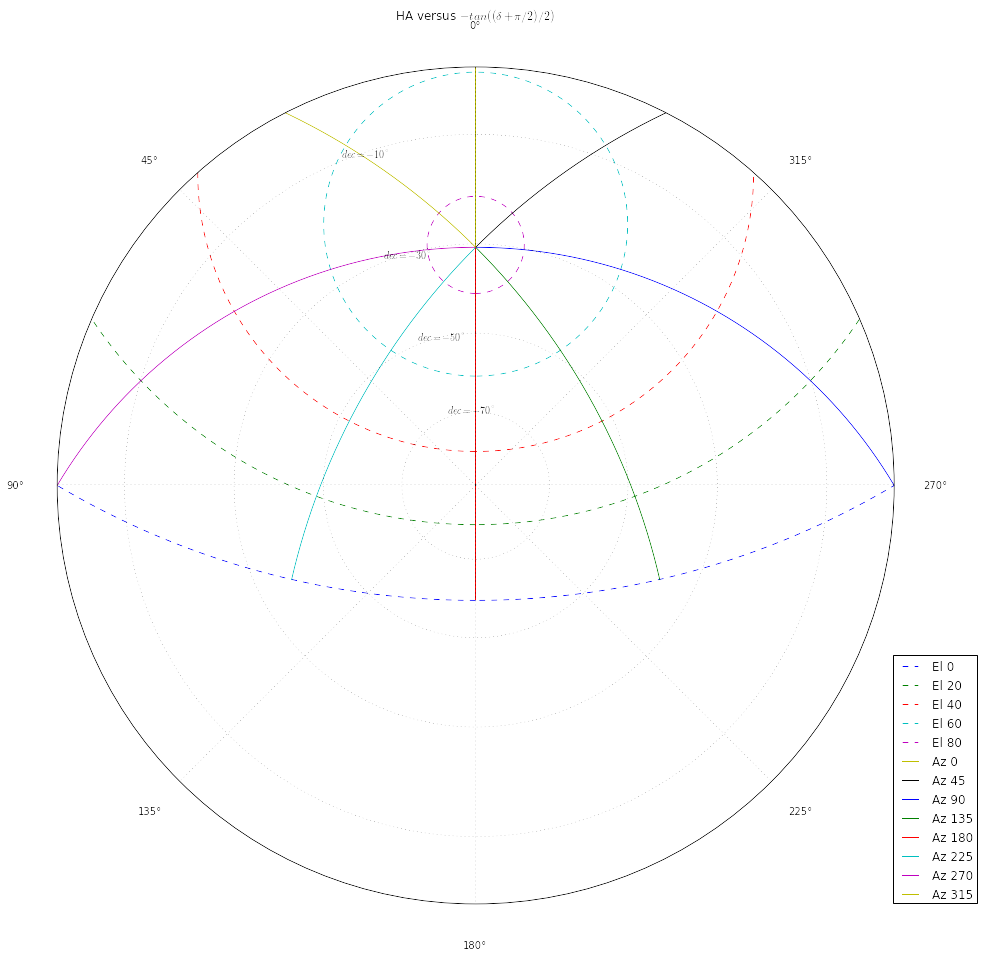

In [4]:
pylab.figure(figsize=(15,15))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)


"""
Given azimuth and elevations work out HA,Dec and plot them

Not working yet

"""


azdeg=np.linspace(-180,180,304) # lots of steps entries 
az=np.radians(azdeg)
for eldeg in np.arange(0,90,20):  # hadeg is HA in degrees, decdeg is Dec in degrees
    el=np.radians(eldeg)
    had=hadec(az,el)
    ha=had[0]
    dec=had[1]
    t2=np.tan((dec+0.5*np.pi)/2.0) # tan/2 zenith angle
 
    ax.plot(ha,t2,label="El "+str(eldeg),linestyle="--")
#
eldeg=np.linspace(0,90,300)
el=np.radians(eldeg)
for azdeg in np.arange(0,360,45):
    #print azdeg
    az=np.radians(azdeg)
    had=hadec(az,el)
    ha=had[0]
    dec=had[1]
    t2=np.tan((dec+0.5*np.pi)/2.0) # tan (0.5 *dec)
    ax.plot(ha,t2,label="Az "+str(azdeg),linestyle="-") 

ax.set_rmax(1.0)

ax.legend( loc=(1.,0.),ncol=1) # 
plt.title('HA versus $-tan((\delta + \pi/2)/2)$')
decs=np.tan(np.radians([10,20,30,40])) # 20,40,60,80 deg 
# add 90 deg for labels
plt.rgrids(decs,labels=['$dec=-70^\circ$','$dec=-50^\circ$','$dec=-30^\circ$','$dec=-10^\circ$'])
# centre of the circle is dec = -90deg, corrsesponds to azim =-180, el=30.7
#outer edge is dec=0
# 
plt.show()


In [5]:
#az=np.pi #radians
#el=0.5*np.pi
az=1.
el=1.
had=hadec(az,el)
h=had[0]
d=had[1]
print h,d ,np.degrees(d)

-0.48035809046 -0.179785675001 -10.3009603944


In [6]:
print elev(h,d)

(0.99999999999999989, 1.0)


In [7]:
print hadec(0., -0.5*np.pi)

(-3.1415926535897931, 0.53607438909155436)


In [8]:
print elev(0.4803580904599507, -0.17978567500052758)

(-0.99999999999999978, 1.0)


In [9]:
print hadec(-az,el)

(0.48035809045995082, -0.17978567500052758)


In [10]:
(3.4644-0.48035)/np.pi

0.9498526158667405

In [11]:
for h in arange(0,3,0.4):
    for d in arange (0.1,-1.3,-0.2):
        a,e=elev(h,d)
        h2,d2=hadec(a,e)
        print("%6.3f %6.3f %6.3f %6.3f %6.3f %6.3f") %(a,e,h-h2,d-d2,h,d)

-0.000  0.935  0.000  0.000  0.000  0.100
-0.000  1.135  0.000  0.000  0.000 -0.100
-0.000  1.335  0.000 -0.000  0.000 -0.300
-0.000  1.535  0.000  0.000  0.000 -0.500
-3.142  1.407 -0.000 -0.000  0.000 -0.700
-3.142  1.207 -0.000  0.000  0.000 -0.900
-3.142  1.007 -0.000  0.000  0.000 -1.100
-0.610  0.828  0.000  0.000  0.400  0.100
-0.792  0.995  0.000  0.000  0.400 -0.100
-1.087  1.137  0.000  0.000  0.400 -0.300
-1.569  1.222  0.000  0.000  0.400 -0.500
-2.148  1.207 -0.000  0.000  0.400 -0.700
-2.576  1.102  0.000  0.000  0.400 -0.900
-2.832  0.952  0.000  0.000  0.400 -1.100
-1.018  0.576  0.000  0.000  0.800  0.100
-1.211  0.704  0.000  0.000  0.800 -0.100
-1.446  0.808  0.000 -0.000  0.800 -0.300
-1.728  0.880  0.000  0.000  0.800 -0.500
-2.045  0.906  0.000  0.000  0.800 -0.700
-2.363  0.883  0.000  0.000  0.800 -0.900
-2.648  0.814  0.000  0.000  0.800 -1.100
-1.288  0.262  0.000  0.000  1.200  0.100
-1.465  0.369  0.000  0.000  1.200 -0.100
-1.657  0.465  0.000  0.000  1.200